In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Car-details-v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape

(8128, 13)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<AxesSubplot: >

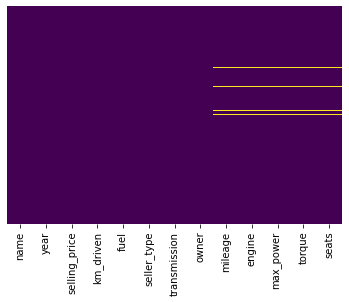

In [7]:
# heatmap finding Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [9]:
# Handeling Missing Values
df.iloc[276]
#df['mileage'].fillna(df['mileage'].mode())

name             Mahindra Scorpio LX
year                            2011
selling_price                 404000
km_driven                     122358
fuel                          Diesel
seller_type               Individual
transmission                  Manual
owner                    First Owner
mileage                   12.05 kmpl
engine                       2179 CC
max_power                    120 bhp
torque           290Nm@ 1800-2800rpm
seats                            9.0
Name: 276, dtype: object

In [10]:
 # df['mileage']=df["mileage"].str.split(" ",expand=True)[0]
# for i in range(len(mileage)):
  #  print(mileage[i][0])
    
df.drop('mileage',axis=1,inplace=True)
df.drop('engine',axis=1,inplace=True)
df.drop('max_power',axis=1,inplace=True)
df.drop('torque',axis=1,inplace=True)
df.drop('seats',axis=1,inplace=True)

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [12]:
# df["engine"]=df["engine"].str.split(" ",expand=True)[0]

In [13]:
# df["max_power"]=df["max_power"].str.split(" ",expand=True)[0]
df['selling_price'] = df['selling_price'].astype(float)

In [14]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [15]:
# df['mileage'] = df['mileage'].fillna(df['mileage'].mode()[0])
# df['engine'] = df['engine'].fillna(df['engine'].mode()[0])
# df['max_power'] = df['max_power'].fillna(df['max_power'].mode()[0])
# df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

<AxesSubplot: >

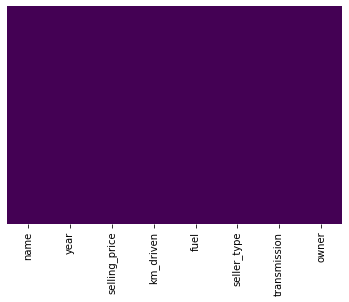

In [16]:
# heatmap finding Null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'LPG':2,'CNG':3}}, inplace=True)
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace=True)


In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

In [19]:
feature_array = ohe.fit_transform(df[['seller_type','transmission']]).toarray()
feature_array

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       ...,
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.]])

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8128 non-null   object 
 1   year                          8128 non-null   int64  
 2   selling_price                 8128 non-null   float64
 3   km_driven                     8128 non-null   int64  
 4   fuel                          8128 non-null   int64  
 5   owner                         8128 non-null   int64  
 6   seller_type_Individual        8128 non-null   float64
 7   seller_type_Trustmark Dealer  8128 non-null   float64
 8   transmission_Manual           8128 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 571.6+ KB


In [ ]:
df['selling_price'] = df['selling_price'].astype(float)

In [20]:
feature_lables = ohe.get_feature_names(['seller_type','transmission'])
feature_lables

C:\Users\tariv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'], dtype=object)

In [21]:
New_df = pd.DataFrame(feature_array, columns = feature_lables)
New_df.head()

,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0


In [22]:
final_df = df.join(New_df)
final_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000.0,145500,1,Individual,Manual,0,1.0,0.0,1.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000.0,120000,1,Individual,Manual,1,1.0,0.0,1.0
2,Honda City 2017-2020 EXi,2006,158000.0,140000,0,Individual,Manual,2,1.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,2010,225000.0,127000,1,Individual,Manual,0,1.0,0.0,1.0
4,Maruti Swift VXI BSIII,2007,130000.0,120000,0,Individual,Manual,0,1.0,0.0,1.0


In [23]:

final_df.drop('seller_type',axis=1,inplace=True)
final_df.drop('transmission',axis=1,inplace=True)

final_df.head()

,name,year,selling_price,km_driven,fuel,owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000.0,145500,1,0,1.0,0.0,1.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000.0,120000,1,1,1.0,0.0,1.0
2,Honda City 2017-2020 EXi,2006,158000.0,140000,0,2,1.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,2010,225000.0,127000,1,0,1.0,0.0,1.0
4,Maruti Swift VXI BSIII,2007,130000.0,120000,0,0,1.0,0.0,1.0


In [24]:
fuel = df['fuel']
seller_type = df['seller_type']
transmission = df['transmission']
selling_price = df['selling_price']

In [25]:
from matplotlib import style

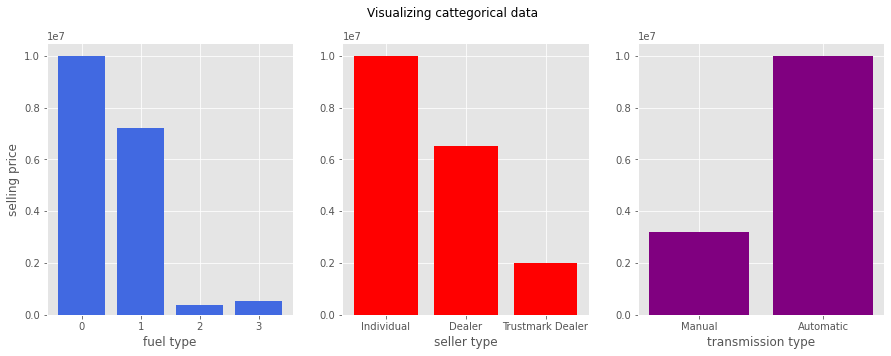

In [26]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing cattegorical data')
plt.subplot(1,3,1)
plt.bar(fuel,selling_price,color='royalblue')
plt.xlabel('fuel type')
plt.ylabel('selling price')
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='red')
plt.xlabel('seller type')
plt.subplot(1,3,3)
plt.bar(transmission,selling_price,color='purple')
plt.xlabel('transmission type')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   float64
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 508.1+ KB


<AxesSubplot: xlabel='transmission', ylabel='selling_price'>

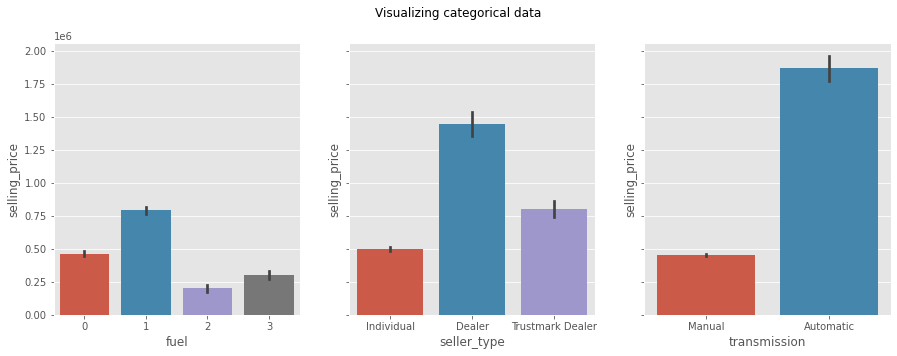

In [28]:
fig, axes = plt.subplots(1,3,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical data')
sns.barplot(x=fuel, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission, y=selling_price, ax=axes[2])

In [29]:
petrol_data = df.groupby('fuel').get_group(0)
petrol_data.describe()

,year,selling_price,km_driven,fuel,owner
count,3631.00000,3.631000e+03,3.631000e+03,3631.0,3631.000000
mean,2013.60314,4.624411e+05,5.284086e+04,0.0,0.450014
std,4.64945,6.247888e+05,5.418518e+04,0.0,0.734936
min,1994.00000,2.999900e+04,1.000000e+03,0.0,0.000000
25%,2011.00000,2.000000e+05,2.500000e+04,0.0,0.000000
50%,2015.00000,3.450000e+05,4.600000e+04,0.0,0.000000
75%,2017.00000,5.500000e+05,7.000000e+04,0.0,1.000000
max,2020.00000,1.000000e+07,2.360457e+06,0.0,4.000000


In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8128 non-null   object 
 1   year                          8128 non-null   int64  
 2   selling_price                 8128 non-null   float64
 3   km_driven                     8128 non-null   int64  
 4   fuel                          8128 non-null   int64  
 5   owner                         8128 non-null   int64  
 6   seller_type_Individual        8128 non-null   float64
 7   seller_type_Trustmark Dealer  8128 non-null   float64
 8   transmission_Manual           8128 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 571.6+ KB


In [31]:
final_df.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
fuel                            0
owner                           0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
dtype: int64

In [32]:
# for i in final_df['max_power']:
#     final_df['max_power'] = final_df['max_power'].replace('', '60.0')# 
# final_df['max_power'] = final_df['max_power'].astype(float)

Text(0.5, 1.0, 'correlation between the coulumns')

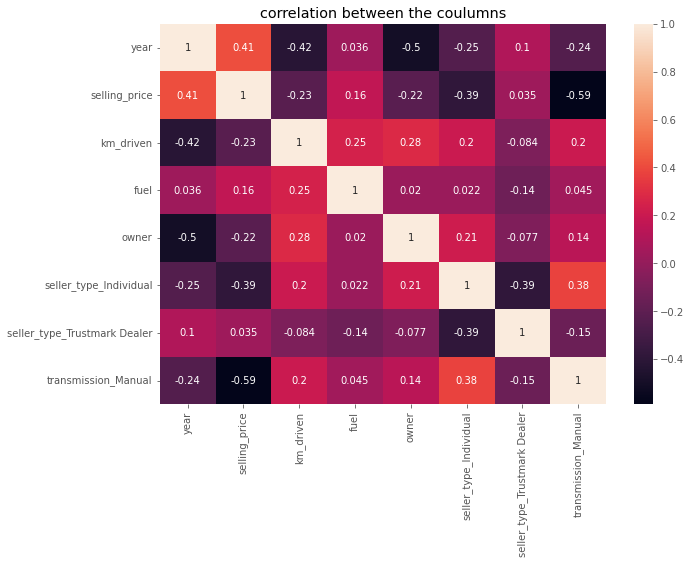

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(final_df.corr(),annot=True)
plt.title('correlation between the coulumns')

<AxesSubplot: title={'center': 'correlation between present price and selling price'}, xlabel='km_driven', ylabel='selling_price'>

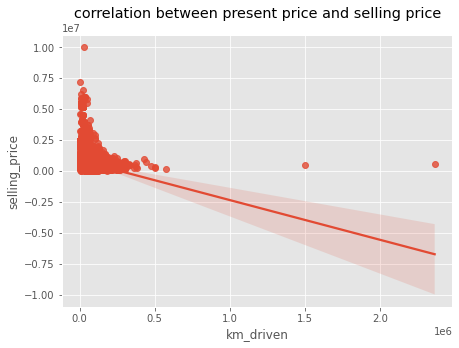

In [34]:
fig=plt.figure(figsize=(7,5))
plt.title('correlation between present price and selling price') #
sns.regplot(x='km_driven',y='selling_price', data=final_df)

In [35]:
# X = final_df.drop(['name','selling_price'], axis=1)
# y = final_df['selling_price']

X = final_df.iloc[:, 3:].values
y = final_df.iloc[:, 2].values

In [36]:
X.shape

(8128, 6)

In [37]:
# y = y1.reshape(len(y1),1)
y.shape

(8128,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print('X_test shape:', X_test.shape)
print('X_train shape: ', X_train.shape)
print('y_test shape: ', y_test.shape)
print('y_train shape: ', y_train.shape)

X_test shape: (2439, 6)
X_train shape:  (5689, 6)
y_test shape:  (2439,)
y_train shape:  (5689,)


In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test)


In [44]:
y_pred

array([ 19147.20363164, 278301.48994638, 605047.2600895 , ...,
       372293.11169823, 313413.89986221,  89983.51947384])

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ', (metrics.mean_absolute_error(y_pred, y_test)))
print('MSE: ', (metrics.mean_squared_error(y_pred, y_test)))
print('R2 score: ', (metrics.r2_score(y_pred, y_test)))

MAE:  346324.3413360764
MSE:  392785599482.4915
R2 score:  -0.32130554489068563


In [46]:
y_pred

array([ 19147.20363164, 278301.48994638, 605047.2600895 , ...,
       372293.11169823, 313413.89986221,  89983.51947384])

In [47]:
y_test

array([198000., 500000., 425000., ..., 500000., 400000., 425000.])

In [48]:
final_df

,name,year,selling_price,km_driven,fuel,owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000.0,145500,1,0,1.0,0.0,1.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000.0,120000,1,1,1.0,0.0,1.0
2,Honda City 2017-2020 EXi,2006,158000.0,140000,0,2,1.0,0.0,1.0
3,Hyundai i20 Sportz Diesel,2010,225000.0,127000,1,0,1.0,0.0,1.0
4,Maruti Swift VXI BSIII,2007,130000.0,120000,0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000.0,110000,0,0,1.0,0.0,1.0
8124,Hyundai Verna CRDi SX,2007,135000.0,119000,1,3,1.0,0.0,1.0
8125,Maruti Swift Dzire ZDi,2009,382000.0,120000,1,0,1.0,0.0,1.0
8126,Tata Indigo CR4,2013,290000.0,25000,1,0,1.0,0.0,1.0


In [49]:
# scaler = StandardScaler()

In [50]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [51]:
# Support Vectore Machine

In [52]:
 y = y1.reshape(len(y1),1)

NameError: name 'y1' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ', (metrics.mean_absolute_error(y_pred, y_test)))
print('MSE: ', (metrics.mean_squared_error(y_pred, y_test)))
print('R2 score: ', (metrics.r2_score(y_pred, y_test)))

In [ ]:
# Decession Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ', (metrics.mean_absolute_error(y_pred, y_test)))
print('MSE: ', (metrics.mean_squared_error(y_pred, y_test)))
print('R2 score: ', (metrics.r2_score(y_pred, y_test)))

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE: ', (metrics.mean_absolute_error(y_pred, y_test)))
print('MSE: ', (metrics.mean_squared_error(y_pred, y_test)))
print('R2 score: ', (metrics.r2_score(y_pred, y_test)))

In [ ]:
# Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

In [ ]:
y_pred_1 = lin_reg_2.predict(poly_reg.fit_transform(X))
y_pred_1

In [ ]:
y_test

In [ ]:
y.shape